In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
# Any results you write to the current directory are saved as output.

/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv
/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv


Using TensorFlow backend.


In [2]:
df_train=pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/train.csv")

In [3]:
df_test=pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/test.csv")

In [4]:
df_test.iloc[:,1:201]=df_test.iloc[:,1:201].astype(np.float32)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float32(200), object(1)
memory usage: 154.1+ MB


In [6]:
df_train.iloc[:,2:202]=df_train.iloc[:,2:202].astype(np.float32)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float32(200), int64(1), object(1)
memory usage: 155.6+ MB


Это я сделал для того чтобы уменьшить обьем памяти 

In [8]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


In [9]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.267500,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.711200,2.4669,4.3654,10.7200,15.472200,-8.719700
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.631599,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.576500,0.4773,-1.4852,9.8714,19.129299,-20.976000
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.253700,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.981300,2.1281,-7.1086,7.0618,19.895599,-23.179399
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.566000,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.187400,3.1656,3.9567,9.2295,13.016800,-4.210800
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.604800,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.554199,-0.2860,-5.1612,7.2882,13.926000,-9.184600


In [10]:
df_test.isna().values.any()

False

In [11]:
df_train.isna().values.any()

False

In [12]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679973,-1.627628,10.715126,6.796523,11.078255,-5.065340,5.408961,16.545988,0.284159,...,3.234436,7.438449,1.927833,3.331773,17.993811,-0.142087,2.303355,8.908224,15.870864,-3.326542
std,0.300653,3.039990,4.049967,2.640832,2.043276,1.623114,7.863115,0.866585,3.418009,3.332576,...,4.559854,3.023208,1.478388,3.991934,3.135113,1.429341,5.454274,0.921603,3.010892,10.437832
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562599,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852798
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064724,4.836800
max,1.000000,20.315001,10.376800,19.353001,13.188300,16.671400,17.251600,8.447700,27.691799,10.151300,...,18.440901,16.716499,8.402400,18.281799,27.928801,4.272900,18.321501,12.000400,26.079100,28.500700


In [13]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658732,-1.624240,10.707497,6.788238,11.076387,-5.050552,5.415207,16.529312,0.277133,7.569351,...,3.189724,7.458230,1.925958,3.322033,17.996922,-0.133656,2.290916,8.912555,15.869393,-3.246347
std,3.036675,4.040431,2.633820,2.052685,1.616426,7.869115,0.864669,3.424418,3.333328,1.231836,...,4.551188,3.025138,1.479932,3.995498,3.140603,1.429652,5.446252,0.920886,3.008664,10.398454
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457802
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391726,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292801,9.665500,11.003600,...,20.358999,16.716499,8.005000,17.632601,27.947800,4.545400,15.920700,12.275800,26.538401,27.907400


Ну train и test очень похожи особенно mean ,max ,min

In [14]:
li=['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15']

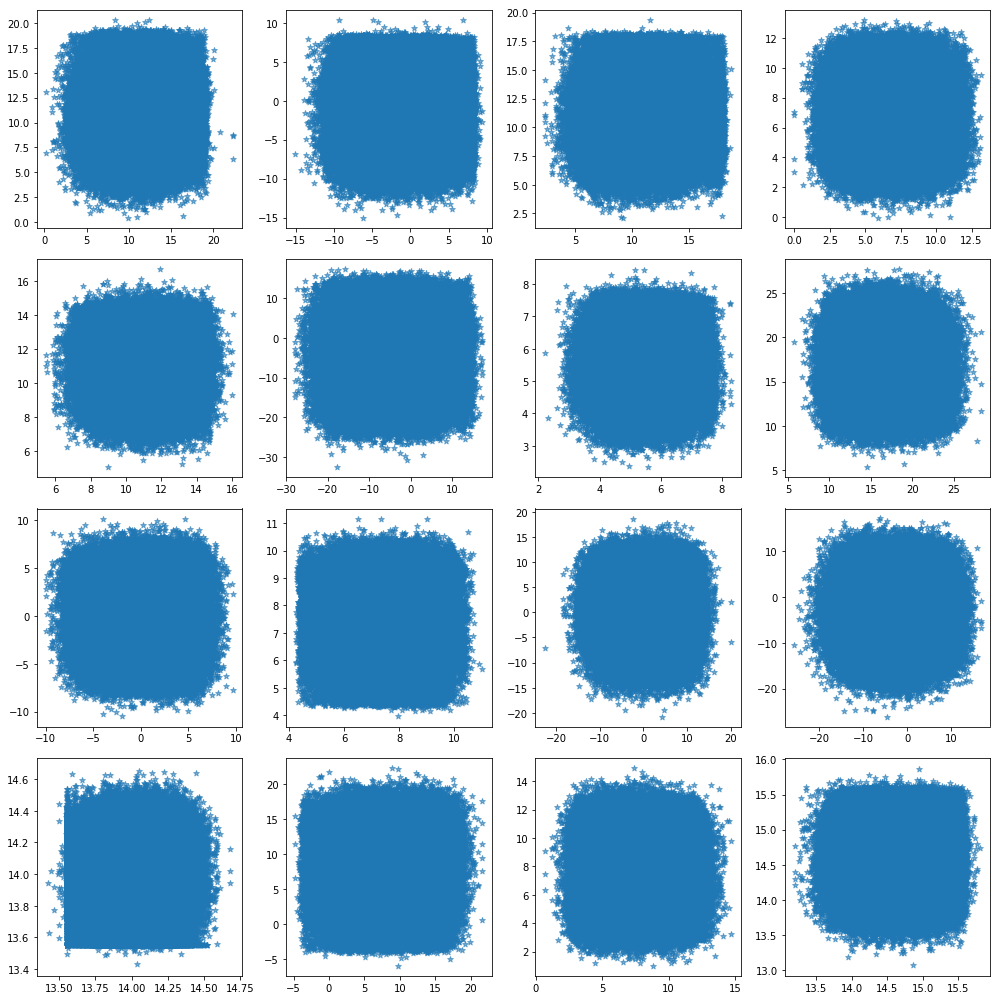

In [15]:
fig, ax = plt.subplots(4,4,figsize=(14,14))
i=0
for il in li:
    i+=1
    plt.subplot(4,4,i)
    plt.scatter(df_test[il],df_train[il],marker="*",alpha=0.6)

plt.tight_layout()
plt.show()

Нету пустот или каких либо оутлееров что говорит нам о том что данные фактически лежат друг на друге 

In [16]:
df_train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Дизбаланс между 0 и 1

In [17]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


In [18]:
cor=df_train.corr()

cor_target = abs(cor["target"])

for i in li:
    relevant_features = cor_target[cor_target>0.3]
    relevant_features

Здесь нету высоко corr значений и отрицетельных тоже

In [19]:
to_drop=["target","ID_code"]

In [20]:
X=df_train.drop(to_drop,1)
y=df_train["target"]

In [21]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.024900,-1.7939,2.1661,8.5326,16.666000,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.271700,1.7337,-2.1651,6.7419,15.905400,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.531099,-1.5736,1.2832,8.7155,13.832900,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.415800,-0.0786,6.7980,10.0342,15.528900,-13.9001


In [22]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000171
Best score using built-in LassoCV: 0.181555


Text(0.5, 1.0, 'Feature importance using Lasso Model')

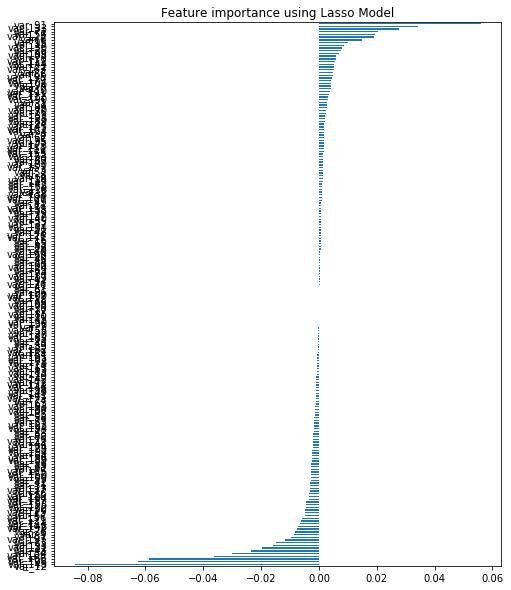

In [23]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [24]:
imp_coef[imp_coef>0.02]

var_53     0.020580
var_71     0.027745
var_133    0.034324
var_91     0.055932
dtype: float32

In [25]:
imp_coef[imp_coef<-0.02]

var_12    -0.084461
var_148   -0.062501
var_108   -0.058838
var_166   -0.036345
var_169   -0.030119
var_34    -0.023513
dtype: float32

С помощью embedded метода мы нашли относительно выделяющиеся значения

In [26]:
to_drope=imp_coef[(imp_coef>-0.000625) & (imp_coef<0.000625)].index.tolist()

ненужные параметры по моему мнению

In [27]:
X_trains,X_test,y_trains,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
logreg = LogisticRegression(C=1, random_state=42)
logreg.fit(X_trains, y_trains)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Я хотел сделать через grid search но он превышал итерации

In [29]:
y_pred = logreg.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9103

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.68      0.21      0.32      4020

    accuracy                           0.91     40000
   macro avg       0.80      0.60      0.63     40000
weighted avg       0.89      0.91      0.89     40000



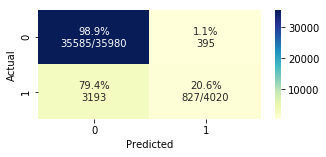

In [32]:
cm=confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

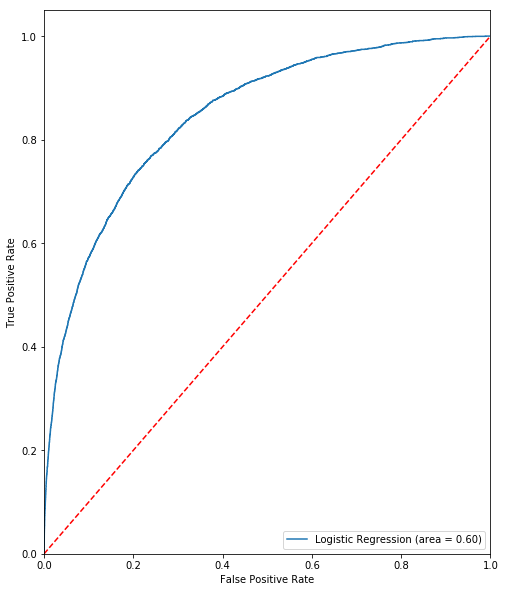

In [33]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
to_drop_beta=["target","ID_code"]
to_drop_beta=to_drope+to_drop_beta
X_beta=df_train.drop(to_drop_beta,1)
y_beta=df_train["target"]

In [35]:
X_trains_b,X_test_b,y_trains_b,y_test_b=train_test_split(X_beta,y_beta,test_size=0.2,random_state=42,stratify=y_beta)

In [36]:
logreg = LogisticRegression(C=1, random_state=42)
logreg.fit(X_trains_b, y_trains_b)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred_b = logreg.predict(X_test_b)

In [38]:
accuracy_score(y_test_b,y_pred_b)

0.91125

In [39]:
print(classification_report(y_test_b,y_pred_b))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.66      0.24      0.35      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



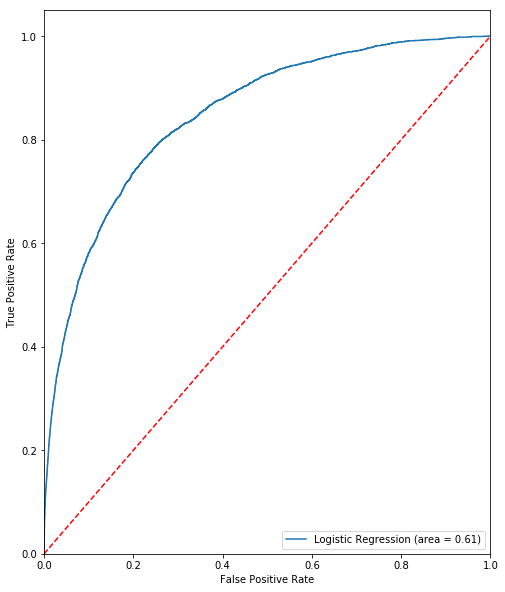

In [40]:
logit_roc_auc = roc_auc_score(y_test_b, logreg.predict(X_test_b))
fpr, tpr, thresholds = roc_curve(y_test_b, logreg.predict_proba(X_test_b)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Значения что я убрал повысили аук рок на 1% и последущие модели я сделаю также

**<center><h1>Support Vector Machines</h1></center>**

In [41]:
clf = svm.SVC(kernel='linear',decision_function_shape='ovr')

ovr Потому что у нас бинарная

SVM просто не компилится пришлось дважды восстанавливать сессию

**<center><h1>Naive Bayes</h1></center>**

In [42]:
clf = GaussianNB()
clf.fit(X_trains_b, y_trains_b)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred_b = clf.predict(X_test_b)

In [44]:
accuracy_score(y_test_b,y_pred_b)

0.91955

In [45]:
print(classification_report(y_test_b,y_pred_b))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     35980
           1       0.71      0.34      0.46      4020

    accuracy                           0.92     40000
   macro avg       0.82      0.66      0.71     40000
weighted avg       0.91      0.92      0.91     40000



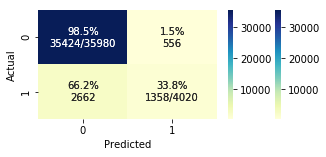

In [46]:
cm=confusion_matrix(y_test_b, y_pred_b)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test_b), columns=np.unique(y_test_b))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

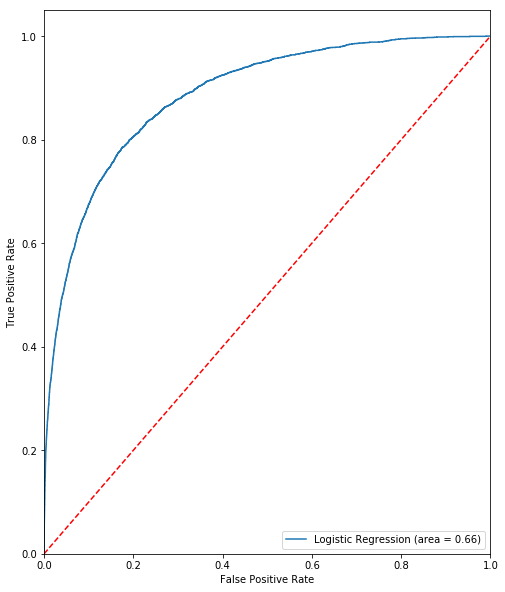

In [47]:
logit_roc_auc = roc_auc_score(y_test_b, clf.predict(X_test_b))
fpr, tpr, thresholds = roc_curve(y_test_b, clf.predict_proba(X_test_b)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
#submission_nb = pd.DataFrame({
#    "ID_code": df_test["ID_code"],
#    "target": y_pred_b
#})
#submission_nb.to_csv('naive_baise_submission.csv', index=False)

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 42)
rf = RandomForestRegressor(n_estimators = 15, random_state = 42)


**<center><h1>Random Forest and Decision Tree</h1></center>**

random forest тоже не компилится

In [50]:
dt.fit(X_trains_b, y_trains_b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [51]:
y_pred_b = dt.predict(X_test_b)

In [52]:
accuracy_score(y_test_b,y_pred_b)

0.838375

In [53]:
print(classification_report(y_test_b,y_pred_b))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     35980
           1       0.21      0.22      0.21      4020

    accuracy                           0.84     40000
   macro avg       0.56      0.56      0.56     40000
weighted avg       0.84      0.84      0.84     40000



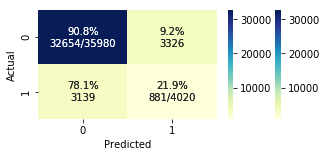

In [54]:
cm=confusion_matrix(y_test_b, y_pred_b)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test_b), columns=np.unique(y_test_b))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

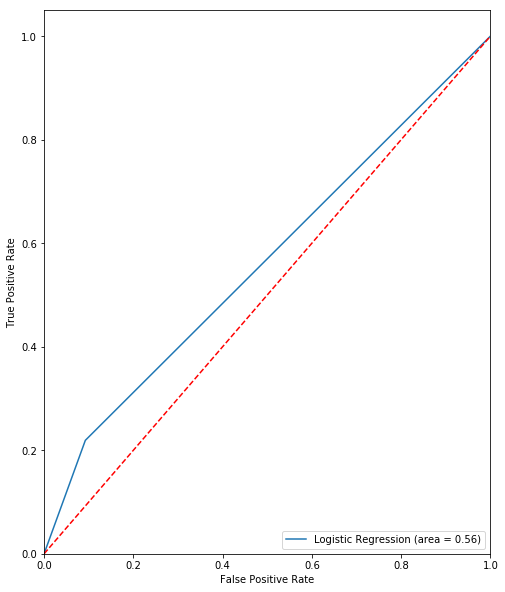

In [55]:
logit_roc_auc = roc_auc_score(y_test_b, dt.predict(X_test_b))
fpr, tpr, thresholds = roc_curve(y_test_b, dt.predict_proba(X_test_b)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


**<center><h1>XGboost</h1></center>**

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_trains_b, y_trains_b)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [57]:
y_pred_b = model.predict(X_test_b)

In [58]:
accuracy_score(y_test_b,y_pred_b)

0.913575

In [59]:
print(classification_report(y_test_b,y_pred_b))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.71      0.24      0.36      4020

    accuracy                           0.91     40000
   macro avg       0.81      0.61      0.66     40000
weighted avg       0.90      0.91      0.89     40000



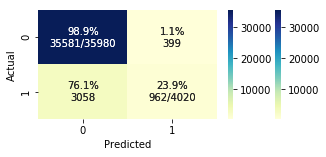

In [60]:
cm=confusion_matrix(y_test_b, y_pred_b)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test_b), columns=np.unique(y_test_b))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

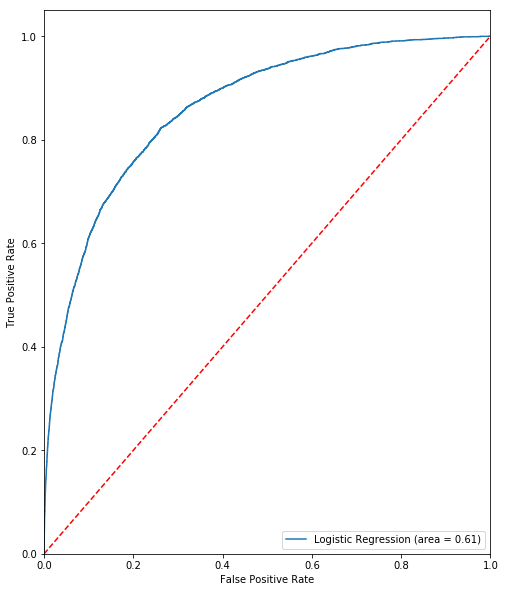

In [61]:
logit_roc_auc = roc_auc_score(y_test_b, model.predict(X_test_b))
fpr, tpr, thresholds = roc_curve(y_test_b, model.predict_proba(X_test_b)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [62]:
testik=df_test.drop(['ID_code'],axis=1)
testik

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.267500,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.711200,2.4669,4.3654,10.7200,15.472200,-8.719700
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.631599,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.576500,0.4773,-1.4852,9.8714,19.129299,-20.976000
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.253700,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.981300,2.1281,-7.1086,7.0618,19.895599,-23.179399
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.566000,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.187400,3.1656,3.9567,9.2295,13.016800,-4.210800
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.604800,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.554199,-0.2860,-5.1612,7.2882,13.926000,-9.184600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.762500,-2.7239,6.9937,...,2.0544,9.6849,4.6734,-1.3660,12.872100,1.2013,-4.6195,9.1568,18.210199,4.880100
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.886200,5.0915,6.3545,...,5.0071,6.6548,1.8197,2.4104,18.903700,-0.9337,2.9995,9.1112,18.174000,-20.768900
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.379400,1.6603,5.7341,...,5.1536,2.6498,2.4937,-0.0637,20.060900,-1.1742,-4.1524,9.1933,11.790500,-22.276199
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.827999,5.3208,8.9032,...,3.4259,8.5012,2.2713,5.7621,17.005600,1.1763,-2.3761,8.1079,8.773500,-0.212200


In [63]:
testik.shape

(200000, 200)

In [64]:
testik=testik.drop(to_drope,1)

In [65]:
cde=df_test[["ID_code"]]
cde=cde.values.reshape(200000,).shape

In [66]:
logreg.predict(testik.values).shape

(200000,)

In [67]:
submission_log=pd.DataFrame(
{
    "ID_code":df_test[["ID_code"]].values.reshape(200000,),
    "target":logreg.predict(testik)
}
)
submission_log["target"].value_counts()
submission_log.to_csv("Logreg.csv",index=False)

In [68]:
submission_bayise=pd.DataFrame(
{
    "ID_code":df_test[["ID_code"]].values.reshape(200000,),
    "target":clf.predict(testik)
}
)
submission_bayise["target"].value_counts()
submission_bayise.to_csv("Bayise.csv",index=False)

In [69]:
submission_xg=pd.DataFrame(
{
    "ID_code":df_test[["ID_code"]].values.reshape(200000,),
    "target":model.predict(testik)
}
)
submission_xg["target"].value_counts()
submission_xg.to_csv("Xgboost.csv",index=False)

In [70]:
submission_tree=pd.DataFrame(
{
    "ID_code":df_test[["ID_code"]].values.reshape(200000,),
    "target":dt.predict(testik)
}
)
submission_tree["target"].value_counts()
submission_tree.to_csv("tree.csv",index=False)